# Importing Libraries

In [1]:
#  Importing libraries for exploratory Data Analysis & Data Visualization

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
#  importing Data 
cars = pd.read_csv("cars.csv")

In [3]:
cars.head()

,Model,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb
0,Mazda RX4,21.0,6,160.0,110.0,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110.0,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93.0,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110.0,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175.0,3.15,3.440,17.02,0,0,3,2


In [4]:
#checking data set shape
print(cars.shape)

(32, 12)


In [15]:
cars.dtypes

Model        object
MPG         float64
Cylinder      int64
Disp        float64
HP          float64
Drat        float64
Wt          float64
Qsec        float64
VS            int64
AM            int64
Gear          int64
Carb          int64
dtype: object

# Exloratory Data Analysis & Visualization

In [5]:
#checking for null values in data set
cars.isnull().sum()

Model       0
MPG         0
Cylinder    0
Disp        3
HP          3
Drat        0
Wt          0
Qsec        0
VS          0
AM          0
Gear        0
Carb        0
dtype: int64

In [17]:
cars=cars.fillna(cars.mean())

In [18]:
cars.isnull().sum()

Model       0
MPG         0
Cylinder    0
Disp        0
HP          0
Drat        0
Wt          0
Qsec        0
VS          0
AM          0
Gear        0
Carb        0
dtype: int64

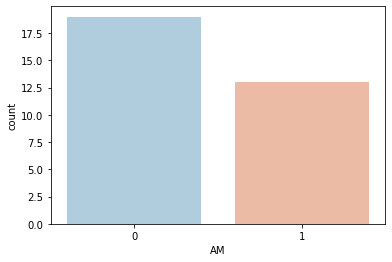

In [19]:
sb.countplot(x='AM',data=cars,palette='RdBu_r')

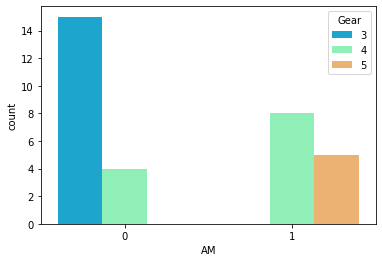

In [20]:

sb.countplot(x='AM',hue='Gear',data=cars,palette='rainbow')

# Training & Testing Split

In [21]:
#car has  Automatic(1) or Manual(0) Gear System  - AM 

# Using predictor variables/ features/ independent variabes, x1, x2, x3,... => X
y = cars.AM
X = cars.loc[:,['MPG','HP','Wt']]

In [22]:
# training and testing model selection
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [24]:
# Importing machine learning algorithm
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()

In [26]:
model.fit(X_train,y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_predict = model.predict(X_test)

In [28]:
y_predict

array([0, 1, 1, 0, 0, 1, 0, 0])

In [29]:
y_test

6     0
27    1
30    1
15    0
3     0
25    1
31    1
1     1
Name: AM, dtype: int64

# Model Evaluation

In [30]:
# Model evaluation 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [31]:
accuracy_score(y_test,y_predict)

0.75

In [32]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.60      0.75         5

    accuracy                           0.75         8
   macro avg       0.80      0.80      0.75         8
weighted avg       0.85      0.75      0.75         8



In [33]:
confusion_matrix(y_test,y_predict)

array([[3, 0],
       [2, 3]])

In [ ]:
6/7